In [1]:
get_ipython().magic(u'matplotlib inline')

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [3]:
# Linear regression
# mileage per gallon = intercept + beta_coef * carweight ......(t)
# target variable is mileage per gallon which is a continuous variable

In [4]:
#logistic function
# S(t) = (1 / (1 + exp(-t)))
# the target variable is binary (0/1, True/False, Accept/Reject)

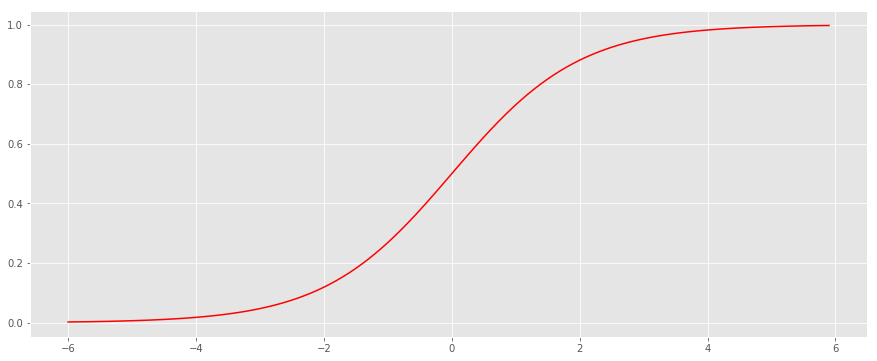

In [5]:
# define the sigmoid function
plt.figure(figsize=(15,6))

def sigmoid(t):
    return (1/(1+np.e**(-t)))

plot_range = np.arange(-6,6,0.1)

y_values = sigmoid(plot_range)

#plot the sigmoid curve
plt.plot(plot_range,
        y_values,
        color='red')


In [6]:
# Logistic Regression using Titanic Dataset
titanic_train = pd.read_csv('https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv')

In [7]:
titanic_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
char_cabin = titanic_train['cabin'].astype(str)

In [9]:
new_Cabin = np.array([cabin[0] for cabin in char_cabin])

In [10]:
titanic_train['cabin'] =pd.Categorical(new_Cabin)


In [11]:
titanic_train.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S


In [12]:
np.where(titanic_train['embarked'].isnull())

(array([ 61, 829]),)

In [13]:
new_age_var = np.where(titanic_train['age'].isnull(),
                      28,
                      titanic_train["age"])

In [14]:
titanic_train['age']= new_age_var

In [15]:
titanic_train.head(3)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S


In [16]:
from sklearn import linear_model
from sklearn import preprocessing

In [17]:
#initialize label encoder
label_encoder= preprocessing.LabelEncoder()

In [18]:
# convert the Sex variable into numeric
encoded_sex= label_encoder.fit_transform(titanic_train['sex'])
encoded_sex[:3]

array([1, 0, 0])

In [19]:
# Initialize the logistic regression model
log_model = linear_model.LogisticRegression()
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Train the model
log_model.fit(X=pd.DataFrame(encoded_sex),
             y= titanic_train["survived"])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# check the model
print(log_model.intercept_)
print(log_model.coef_)


[ 1.00027876]
[[-2.43010712]]


In [22]:
log_model.predict(X = pd.DataFrame(encoded_sex))[:10]


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [23]:
# make predictions
preds = log_model.predict_proba(X = pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ['No_Survival','Survived']

In [24]:
print (preds.head())

   No_Survival  Survived
0     0.806875  0.193125
1     0.268887  0.731113
2     0.268887  0.731113
3     0.268887  0.731113
4     0.806875  0.193125


In [25]:
pd.crosstab(titanic_train['survived'],preds['Survived'])


Survived,0.193125428972,0.731113382332
survived,,
0,468,81
1,109,233


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
# result is not up to expectation, hence we need to add more variables into the model and see the prediction
encoded_class= label_encoder.fit_transform(titanic_train['pclass'])
encoded_cabin= label_encoder.fit_transform(titanic_train['cabin'])

In [28]:
train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["age"]]).T

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# Initialize the logistic regression model
log_model = linear_model.LogisticRegression()

In [31]:
# Train the model
log_model.fit(X=train_features,y = titanic_train["survived"])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# check the model
print(log_model.intercept_)
print(log_model.coef_)

[ 3.32716302]
[[-0.90790164 -0.06426483 -2.43179802 -0.0265924 ]]


In [33]:
# make predictions
preds = log_model.predict(X = train_features)
pd.crosstab(preds,titanic_train['survived'])


survived,0,1
row_0,,
0,463,98
1,86,244


In [34]:
print(confusion_matrix(preds,titanic_train['survived'])) #0.5 prob cut
print(classification_report(preds,titanic_train['survived']))

[[463  98]
 [ 86 244]]
             precision    recall  f1-score   support

          0       0.84      0.83      0.83       561
          1       0.71      0.74      0.73       330

avg / total       0.80      0.79      0.79       891



In [35]:
print(confusion_matrix(pred_y,titanic_train['survived'])) # 0.7 prob cut
print(classification_report(pred_y,titanic_train['survived']))

NameError: name 'pred_y' is not defined

In [ ]:
log_model.score(X= train_features,
               y=titanic_train['survived'])

In [ ]:
preds = log_model.predict_proba(X= train_features)
preds = pd.DataFrame(preds)
preds.columns = ['No_Survival','Survived']

In [ ]:
preds.head()

In [ ]:
from sklearn import metrics


In [ ]:
def func(x):
    x = np.where(x>0.7,0,1)
    return x

In [ ]:
pred_y = func(preds.No_Survival)


In [ ]:
preds = log_model.predict(X = train_features) # with a probability threshold of 0.50
pd.crosstab(preds,titanic_train['survived'])


In [ ]:
fpr,tpr,_ = metrics.roc_curve(titanic_train['survived'],preds)

In [ ]:
df = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

In [ ]:
df.head()

In [ ]:
AUC = metrics.auc(fpr,tpr)

In [ ]:
print (AUC)

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% AUC)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Cancer Dataset Classification Problem

In [91]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                  header=None)

In [92]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [93]:
data.columns = ['code_num','Clump_Thickness','Cell_Size','Cell_Shape','Adhesion','Single_Epithelial','Bare_Nuclei',
               'Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

In [94]:
data.head()

,code_num,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [95]:
data.count() #missing values?

code_num             699
Clump_Thickness      699
Cell_Size            699
Cell_Shape           699
Adhesion             699
Single_Epithelial    699
Bare_Nuclei          699
Bland_Chromatin      699
Normal_Nucleoli      699
Mitoses              699
Class                699
dtype: int64

In [96]:
list(data.columns.values)

['code_num',
 'Clump_Thickness',
 'Cell_Size',
 'Cell_Shape',
 'Adhesion',
 'Single_Epithelial',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses',
 'Class']

In [97]:
df = data

In [98]:
df.columns.tolist

<bound method Index.tolist of Index(['code_num', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Adhesion',
       'Single_Epithelial', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')>

In [99]:
df = df.dropna()

In [100]:
df.head()

,code_num,Clump_Thickness,Cell_Size,Cell_Shape,Adhesion,Single_Epithelial,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [101]:
import matplotlib.pyplot as plt
import numpy as np

In [102]:
df.shape[0]
df_train = df.iloc[0:400,:]
df_test = df.iloc[401:,:]

In [103]:
df_train.shape

(400, 11)

In [104]:
df_test.shape

(298, 11)

In [105]:
formula = 'Class ~ code_num + Clump_Thickness + Cell_Size + Cell_Shape + Adhesion + Single_Epithelial + Bare_Nuclei + Bland_Chromatin + Normal_Nucleoli + Mitoses'

In [106]:
import patsy
from patsy import dmatrices

In [107]:
YTrain, XTrain = dmatrices(formula, data = df_train, return_type = 'dataframe')
YTest, XTest = dmatrices(formula, data = df_test, return_type = 'dataframe')

In [108]:
print (YTrain.shape, XTrain.shape,YTest.shape, XTest.shape)


(400, 1) (400, 20) (298, 1) (298, 18)


In [109]:
import statsmodels.formula.api as sm

In [110]:
YTrain = np.array(YTrain).ravel()
YTest = np.array(YTest).ravel()

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
model1 = LogisticRegression()
print (model1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [113]:
model1.fit(XTrain,YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
model1.score(XTrain,YTrain) #0.57250000000000001 - Model accuracy

0.57250000000000001

In [115]:
modelCancer = LogisticRegression(penalty='l2') # Ridge regression
modelCancer.fit(XTrain,YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
modelCancer.score(XTrain,YTrain)

0.57250000000000001

In [117]:
modelCancer = LogisticRegression(penalty='l1') # SISN CE THE RECORDS, ROWS, SAMPLES ARE LESS THAN 50*NUMBER_FEATURES
# THERE IS A SPARSITY SCENARIO, HENCE WE AFRE GOING TO APPLY L1 PENALTY AS A REGULARIZED PARAMETER
modelCancer.fit(XTrain,YTrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
modelCancer.score(XTrain,YTrain) # this increase in accuracy is due to application of L1 penalty

0.95499999999999996

# Multinomial Logistic regression scenario

In [119]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

In [66]:
diabetes = datasets.load_diabetes()

In [67]:
X = diabetes.data
Y = diabetes.target

In [68]:
alphas,_,coefs = linear_model.lars_path(X,Y, method='lasso',verbose=True)

.

In [69]:
alphas

array([ 2.14804358,  2.01202713,  1.02466283,  0.71509967,  0.29441369,
        0.20086523,  0.15602991,  0.04520646,  0.01239247,  0.01151398,
        0.00493722,  0.00296479,  0.        ])

In [70]:
coefs

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,   -5.718948  ,   -7.01124515,
         -10.01219782],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  -74.91651394, -111.97855446, -197.75650114,
        -226.13366183, -227.17579824, -234.39762164, -237.100786  ,
        -239.81908937],
       [   0.        ,   60.11926965,  361.89461246,  434.75795962,
         505.65955847,  511.3480707 ,  512.04408899,  522.26484702,
         526.88546671,  526.39059435,  522.64878576,  521.0751302 ,
         519.83978679],
       [   0.        ,    0.        ,    0.        ,   79.23644688,
         191.26988358,  234.15461616,  252.5270165 ,  297.15973689,
         314.38927158,  314.95046722,  320.34255435,  321.54902678,
         324.39042769],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.       

In [71]:
XX = np.sum(np.abs(coefs.T),axis=1)
XX/= XX[-1]

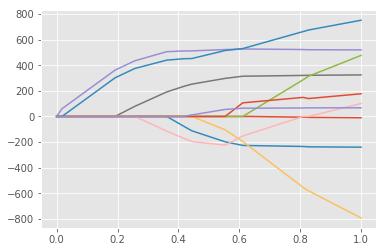

In [72]:
plt.plot(XX,coefs.T)
plt.show()

In [73]:
modelCancer.score(XTrain,YTrain)

0.95499999999999996

In [120]:
from sklearn.datasets import load_digits
digitData = load_digits()

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [122]:
scaler = StandardScaler()

In [123]:
X = digitData['data']
Y = digitData['target']

In [126]:
print (set(Y))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [79]:
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.25,
                                                random_state=1234)


In [80]:
XTrain.shape, XTest.shape, YTrain.shape, YTest.shape

((1347, 64), (450, 64), (1347,), (450,))

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
modelDigit = LogisticRegression(penalty='l1')
modelDigit.fit(XTrain,YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
modelDigit.score(XTrain,YTrain)

0.99628804751299183

In [84]:
modelDigit.score(XTest,YTest)

0.9622222222222222

In [85]:
from sklearn import metrics
preds = modelDigit.predict(XTest)

In [86]:
print (metrics.confusion_matrix(YTest,preds))


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  1  0  0  0]
 [ 0  0 48  1  0  0  0  0  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 0  1  0  0 49  0  0  1  1  0]
 [ 0  0  0  0  0 48  1  0  0  0]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  2  1  1  0  0  0  0 38  1]
 [ 0  0  0  0  0  0  0  1  2 41]]


In [87]:
print (metrics.classification_report(YTest, preds))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.92      0.98      0.95        47
          2       0.98      0.98      0.98        49
          3       0.96      0.98      0.97        44
          4       1.00      0.94      0.97        52
          5       0.98      0.98      0.98        49
          6       0.96      0.96      0.96        45
          7       0.95      1.00      0.98        40
          8       0.90      0.88      0.89        43
          9       0.98      0.93      0.95        44

avg / total       0.96      0.96      0.96       450



In [88]:
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
modelDigit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
# AUC = 0.8----1.0----Very good model
# AUC = 0.7 ----0.8 -- good model
# AUC = 0.5---0.7--- needs improvement
# AUC = < 0.5 ---BAD